The upgrade
- Fake CoT: revision

using the cases

CASES: 
Correct guess but in a different context in darija due to emphasis 2  

Correct guess but only in Standard Arabic (revert to standard arabic) 3

Correct but model doesnt follow instructions: 4
  - adds an article or "to" or "will", etc. and doesnt answer with a word-by-word as instructed. 2
  - interprets it as a name 1
  - intereprets it as a conjunction 1

Not correct 5
  - unique in darija 3
  - exists in standard arabic but missed it 2

other 1


One other 
I wonder if emphasis issues will be resolved with context. (sentences?)

In [19]:

from openai import OpenAI
import pandas as pd
client = OpenAI()
#User: simulates what a user might say to the model: input from the user in a conversation.
#Assistant: simulates the model's own responses.
#System: System messages are used to give instructions or settings that affect the model's behavior. 
    #These messages can define the context, persona, or specific instructions that the model should follow throughout the interaction.

df = pd.read_csv('verbs.csv')

def translate_verb():
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English." +
             "Purpose of the translation: To study the accuracy of LLMs on Darija," +
             "making sure that the language accounts for particular nuances of the language such as emphasis and articulation."+
             "Target audience: Darija Computational linguists"
            },
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect verb into English using word-by-word translation."+
             "You must account for concepts such as articulation and emphasis in Darija and unique verbs to the language." + 
             "The output must not be an infinitive verb. No explanations are needed in the output"
             },
            {"role": "assistant", "content": "OK, I understand. I am ready for the verb translation."},

## fake CoT. 

            #- {9rra read teach}: in the prononciation model does not interpret articulation and emphasis doesnt recognise.
            {"role": "user", "content": "قرّا"},
            {"role": "assistant", "content": "read"},
            {"role": "user", "content": "Please pay attention to the diacritics used in the previous verb."},
            {"role": "assistant", "content": "teach"},

            #- {Da9 knocked taste}: darija doesnt use letter "dh" instead it uses a lighter one in speech and writing d and that makes an interpretation difference for the model. Tho the model doesnt notice the emphasis difference and base its translation presumably on that letter. possible reversion to arabic. 
            {"role": "user", "content": "داق"},
            {"role": "assistant", "content": "knocked"},
            {"role": "user", "content": "Please pay attention to the special articulation in Darija and the use of 'د' instead of 'ذ' in Darija."},
            {"role": "assistant", "content": "taste"},
            
            #- {wlla or become}
            {"role": "user", "content": "ولّا"},
            {"role": "assistant", "content": "or"},
            {"role": "user", "content": "You are provided with a verb. Please translate to a verb."},
            {"role": "assistant", "content": "become"},
            
            #- {3na have mean}
            {"role": "user", "content": "عنا"},
            {"role": "assistant", "content": "have"},
            {"role": "user", "content": "This is not the meaning in Darija. Please provide the translation from Darija to English."},
            {"role": "assistant", "content": "mean"},

            #- {chedd tighten get}: meaning can only be infered from context in darija
            {"role": "user", "content": "شدّ"},
            {"role": "assistant", "content": "tighten"},
            {"role": "user", "content": "This is not the meaning in Darija. Please provide the translation from Darija to English."},
            {"role": "assistant", "content": "get"},

            #- {ghdb get-angry anger} : model doesnt follow instruction as told 
            {"role": "user", "content": "غضب"},
            {"role": "assistant", "content": "get-angry"},
            {"role": "user", "content": "Please output a lemma of the verb."},
            {"role": "assistant", "content": "anger"},

            #- {dar HOUSE DO}: has a right interpretation but as a name. model doesnt recognize it as a verb. unique to darija
            {"role": "user", "content": "دار"},
            {"role": "assistant", "content": "house"},
            {"role": "user", "content": "You are provided with a verb. Please translate to a verb."},
            {"role": "assistant", "content": "do"},
#
            ##- {3ndo he-has have} : doesnt follow instructions
            {"role": "user", "content": "عندو"},
            {"role": "assistant", "content": "he-has"},  
            {"role": "user", "content": "Please output a lemma of the verb."},
            {"role": "assistant", "content": "have"},  
#

            ##- {slat asked take_off}. has outputted a verb that sounds the same. Reversion to MSA.
            {"role": "user", "content": "سلت"},
            {"role": "assistant", "content": "pray"},  
            {"role": "user", "content": "This is not the meaning in Darija. Please provide the translation from Darija to English."},
            {"role": "assistant", "content": "take off"},

#
            ##- {3am live swim}  can be interpreted as "year" but also has a meaning in the dictionary of arabic with swim but it's an old meaning that's not usually used in Arabic nowadays only in Darija. Model has ouputted a random verb which at least is conform to the query of a verb output.  
            {"role": "user", "content": "عام"},
            {"role": "assistant", "content": "year"},  
            {"role": "user", "content": "You are provided with a verb. Please translate to a verb."},
            {"role": "assistant", "content": "swim"},
#
            ##- {Tala3 go_out ascend} : in darija this has a deviated meaning the msa might have deviated long ago => makes sense
            {"role": "user", "content": "طلع"},
            {"role": "assistant", "content": "go out"},
            {"role": "user", "content": "Do not revert to Standard Arabic or other Middle Eastern Dialects. Please provide the translation from Darija to English."},
            {"role": "assistant", "content": "ascend"},

            #- {9as measured touch}:  revert to msa.
            {"role": "user", "content": "قاس"},   
             {"role": "assistant", "content": "measure"},
            {"role": "user", "content": "Do not revert to Standard Arabic. Please provide the translation from Darija to English."},
            {"role": "assistant", "content": "touch"},


            {"role": "user", "content": "عام"},            
            {"role": "system", "content":  "Please make sure to revision your output and provide a lemma of the verb that follows Darija rules." }
            ], 
        temperature=0.1  # Deterministic responses
        )
    return completion.choices[0].message.content
test  = translate_verb()

# Display or save the resulting DataFrame
print(test)

year


In [20]:

from openai import OpenAI
import pandas as pd
client = OpenAI()
#User: simulates what a user might say to the model: input from the user in a conversation.
#Assistant: simulates the model's own responses.
#System: System messages are used to give instructions or settings that affect the model's behavior. 
    #These messages can define the context, persona, or specific instructions that the model should follow throughout the interaction.

df = pd.read_csv('verbs.csv')

def translate_verb(arb):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English." +
             "Purpose of the translation: To study the accuracy of LLMs on Darija," +
             "making sure that the language accounts for particular nuances of the language such as emphasis and articulation."+
             "Target audience: Darija Computational linguists"
            },
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect verb into English using word-by-word translation."+
             "You must account for concepts such as articulation and emphasis in Darija and unique verbs to the language." + 
             "The output must not be an infinitive verb. No explanations are needed in the output"
             },
            {"role": "assistant", "content": "OK, I understand. I am ready for the verb translation."},

## fake CoT. 

            #- {9rra read teach}: in the prononciation model does not interpret articulation and emphasis doesnt recognise.
            {"role": "user", "content": "قرّا"},
            {"role": "assistant", "content": "read"},
            {"role": "user", "content": "Please pay attention to the diacritics used in the previous verb."},
            {"role": "assistant", "content": "teach"},

            #- {Da9 knocked taste}: darija doesnt use letter "dh" instead it uses a lighter one in speech and writing d and that makes an interpretation difference for the model. Tho the model doesnt notice the emphasis difference and base its translation presumably on that letter. possible reversion to arabic. 
            {"role": "user", "content": "داق"},
            {"role": "assistant", "content": "knocked"},
            {"role": "user", "content": "Please pay attention to the special articulation in Darija and the use of 'د' instead of 'ذ' in Darija."},
            {"role": "assistant", "content": "taste"},
            
            #- {wlla or become}
            {"role": "user", "content": "ولّا"},
            {"role": "assistant", "content": "or"},
            {"role": "user", "content": "You are provided with a verb. Please translate to a verb."},
            {"role": "assistant", "content": "become"},
            
            #- {3na have mean}
            {"role": "user", "content": "عنا"},
            {"role": "assistant", "content": "have"},
            {"role": "user", "content": "This is not the meaning in Darija. Please provide the translation from Darija to English."},
            {"role": "assistant", "content": "mean"},

            #- {chedd tighten get}: meaning can only be infered from context in darija
            {"role": "user", "content": "شدّ"},
            {"role": "assistant", "content": "tighten"},
            {"role": "user", "content": "This is not the meaning in Darija. Please provide the translation from Darija to English."},
            {"role": "assistant", "content": "get"},

            #- {ghdb get-angry anger} : model doesnt follow instruction as told 
            {"role": "user", "content": "غضب"},
            {"role": "assistant", "content": "get-angry"},
            {"role": "user", "content": "Please output a lemma of the verb."},
            {"role": "assistant", "content": "anger"},

            #- {dar HOUSE DO}: has a right interpretation but as a name. model doesnt recognize it as a verb. unique to darija
            {"role": "user", "content": "دار"},
            {"role": "assistant", "content": "house"},
            {"role": "user", "content": "You are provided with a verb. Please translate to a verb."},
            {"role": "assistant", "content": "do"},
#
            ##- {3ndo he-has have} : doesnt follow instructions
            {"role": "user", "content": "عندو"},
            {"role": "assistant", "content": "he-has"},  
            {"role": "user", "content": "Please output a lemma of the verb."},
            {"role": "assistant", "content": "have"},  
#

            ##- {slat asked take_off}. has outputted a verb that sounds the same. Reversion to MSA.
            {"role": "user", "content": "سلت"},
            {"role": "assistant", "content": "pray"},  
            {"role": "user", "content": "This is not the meaning in Darija. Please provide the translation from Darija to English."},
            {"role": "assistant", "content": "take off"},

#
            ##- {3am live swim}  can be interpreted as "year" but also has a meaning in the dictionary of arabic with swim but it's an old meaning that's not usually used in Arabic nowadays only in Darija. Model has ouputted a random verb which at least is conform to the query of a verb output.  
            {"role": "user", "content": "عام"},
            {"role": "assistant", "content": "year"},  
            {"role": "user", "content": "You are provided with a verb. Please translate to a verb."},
            {"role": "assistant", "content": "swim"},
#
            ##- {Tala3 go_out ascend} : in darija this has a deviated meaning the msa might have deviated long ago => makes sense
            {"role": "user", "content": "طلع"},
            {"role": "assistant", "content": "go out"},
            {"role": "user", "content": "Do not revert to Standard Arabic or other Middle Eastern Dialects. Please provide the translation from Darija to English."},
            {"role": "assistant", "content": "ascend"},

            #- {9as measured touch}:  revert to msa.
            {"role": "user", "content": "قاس"},   
             {"role": "assistant", "content": "measure"},
            {"role": "user", "content": "Do not revert to Standard Arabic. Please provide the translation from Darija to English."},
            {"role": "assistant", "content": "touch"},


            {"role": "user", "content": f"{arb}"},            
            {"role": "system", "content":  "Please make sure to revision your output and provide a lemma of the verb that follows Darija rules." }
            ], 
        temperature=0.1  # Deterministic responses
        )
    return completion.choices[0].message.content
df['transl'] = df['darija_ar'].apply(translate_verb)

# Display or save the resulting DataFrame
print(df['transl'])

0              eat
1            drink
2            enter
3             exit
4       understand
           ...    
1027         reach
1028      turn-off
1029         smell
1030         cheat
1031          peel
Name: transl, Length: 1032, dtype: object


[('eat', 'eat', 1.0, True), ('drink', 'drink', 1.0, True), ('enter', 'enter', 1.0, True), ('exit', 'go_out', 1.0, True), ('understand', 'understand', 1.0, True), ('explain', 'explain', 1.0, True), ('read', 'learn', 1.0, True), ('read', 'teach', 0.25, False), ('hear', 'hear', 1.0, True), ('see', 'see', 1.0, True), ('smell', 'smell', 1.0, True), ('taste', 'taste', 1.0, True), ('measure', 'touch', 0.25, False), ('go', 'go', 1.0, True), ('come', 'come', 1.0, True), ('go_up', 'ascend', 1.0, True), ('descend', 'go_down', 1.0, True), ('year', 'swim', 0, False), ('drown', 'drown', 1.0, True), ('wear', 'wear', 1.0, True), ('ask', 'take_off', 0.25, False), ('buy', 'buy', 1.0, True), ('sell', 'sell', 1.0, True), ('carry', 'bargain', 0.16666666666666666, False), ('write', 'write', 1.0, True), ('wipe', 'clean', 0.16666666666666666, False), ('hit', 'hit', 1.0, True), ('greet', 'salute', 0.5, True), ('tired', 'fatigue', 1.0, True), ('shake', 'exhaust', 0.25, False), ('laugh', 'laugh', 1.0, True), ('a

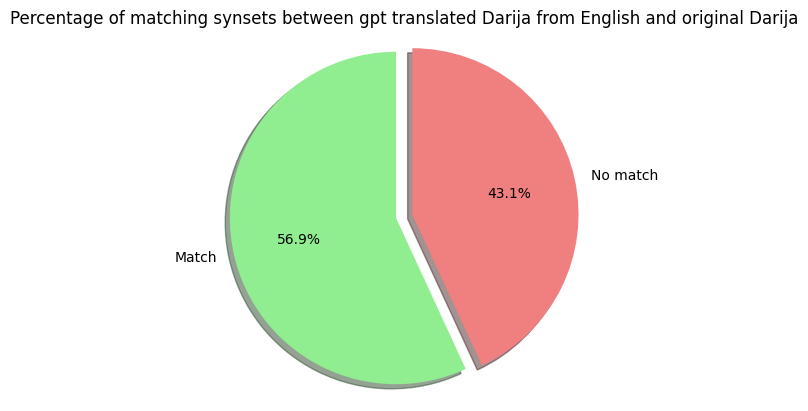

In [21]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

eng = df['eng']
transl = df['transl']

transl = [verb.replace(" ", "_") for verb in transl]
eng = [verb.replace(" ", "_") for verb in eng]

def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""

    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score
# Calculate and print the path similarity for each pair of verbs with similar index

def evaluate_pairs(threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((word1, word2, similarity, similarity >= threshold))
    return results
results = evaluate_pairs()
print(results)


# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")
plt.show()
